<a href="https://colab.research.google.com/github/ucfilho/ML_test/blob/master/plot_linear_model_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline


# Use the RidgeCV and LassoCV to set the regularization parameter






Load the diabetes dataset



In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data.data, data.target
print(X.shape)

(442, 10)


Compute the cross-validation score with the default hyper-parameters



In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

for Model in [Ridge, Lasso]:
    model = Model()
    print('%s: %s' % (Model.__name__,
                      cross_val_score(model, X, y).mean()))

Ridge: 0.40942743830329875
Lasso: 0.35380008329932017


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


We compute the cross-validation score as a function of alpha, the
strength of the regularization for Lasso and Ridge



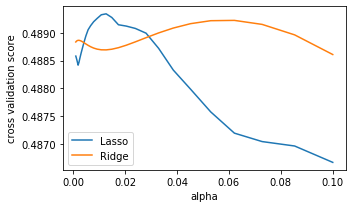

In [4]:
import numpy as np
from matplotlib import pyplot as plt

alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()